In [ ]:
import os
import urllib.request
import torch
import torch.nn as nn

file_path = "Tamil_Articles_Corpus_TamilTamilBrahmi.txt"

with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

In [ ]:
import os
import urllib.request
import torch
import torch.nn as nn

file_path = "Tamil_Articles_Corpus_TamilTamilBrahmi.txt"

# Create a prototype file with the first 5 million characters
prototype_path = "prototype.txt"
with open(file_path, "r", encoding="utf-8") as src, open(prototype_path, "w", encoding="utf-8") as dst:
    chunk = src.read(5_000_000)
    dst.write(chunk)
    



In [4]:
file_path = "prototype.txt"

with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()


In [18]:
def unique_chars_from_file(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        text = f.read()
    # Remove all digits
    text = ''.join([c for c in text if not c.isdigit()])
    # Get unique characters
    unique_chars = sorted(set(text))
    return unique_chars

# Example usage:
chars = unique_chars_from_file("token_dev.txt")
print(len(chars))

67


In [ ]:
import re

def preprocess(raw_text):
    """
    Split raw text into tokens, retaining custom <|Next Line|> markers,
    non-English tokens, and months/years (number tokens).
    """

    # Remove URLs
    raw_text = re.sub(r'https?://\S+', '', raw_text)
    
    # Normalize first by adding a marker for new lines
    raw_text = raw_text.replace('\n', ' <|Next Line|> ')

    # Split by punctuation or whitespace, but keep <|Next Line|> together
    result = re.split(r'(\<\|Next Line\|>|[<>,.:;?_!"()\']|--|\s)', raw_text)

    # Filter out empty or whitespace tokens
    cleaned = [item for item in result if item.strip()]
    
    # Filter out English tokens except <|Next Line|> and number tokens
    cleaned = [item for item in cleaned
               if item == "<|Next Line|>" or
               item.isdigit() or
               not re.search(r'[a-zA-Z]', item)]

    return cleaned

In [11]:
text_data[:100]

'𑀑𑁆𑀮𑀺𑀫𑁆𑀧𑀺𑀓𑁆 𑀧𑁄𑀝𑁆𑀝𑀺𑀓𑀴𑁆 𑀦𑀝𑀦𑁆𑀢 𑀇𑀝𑀗𑁆𑀓𑀴𑁆 1. 1896 - 𑀏𑀢𑁂𑁆𑀷𑁆𑀲𑁆, 𑀓𑀺𑀭𑀻𑀲𑁆 2. 1900 - 𑀧𑀸𑀭𑀺𑀲𑁆, 𑀧𑀺𑀭𑀸𑀷𑁆𑀲𑁆 3. 1904 - 𑀘'

In [12]:
preprocessed = (preprocess(text_data))

In [16]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<unk>"])

vocab = {word: i for i, word in enumerate(all_tokens)}
print(len(vocab))

for i, word in enumerate(list(vocab.items())):
    print(f"{i}: {word}")

2043
0: ('!', 0)
1: ('"', 1)
2: ('#', 2)
3: ('#1', 3)
4: ('#2', 4)
5: ('#3', 5)
6: ('#30', 6)
7: ('$', 7)
8: ('$10', 8)
9: ('$100', 9)
10: ('$2', 10)
11: ('$20000', 11)
12: ('$25', 12)
13: ('$250', 13)
14: ('$40', 14)
15: ('$5', 15)
16: ('$50', 16)
17: ('$70', 17)
18: ('$70-90', 18)
19: ('$75', 19)
20: ('%', 20)
21: ('&', 21)
22: ('&-', 22)
23: ("'", 23)
24: ('(', 24)
25: (')', 25)
26: ('*', 26)
27: ('**', 27)
28: ('***', 28)
29: ('****', 29)
30: ('********************************', 30)
31: ('***’', 31)
32: ('**’', 32)
33: ('**”', 33)
34: ('*-', 34)
35: ('*/', 35)
36: ('*1960', 36)
37: ('*4', 37)
38: ('*400', 38)
39: ('*[', 39)
40: ('+', 40)
41: ('++', 41)
42: ('+++++++++++++++++++++++++++++++++++++++', 42)
43: ('+1', 43)
44: ('+2', 44)
45: ('+2-', 45)
46: ('+49', 46)
47: ('+499548', 47)
48: ('+499548-', 48)
49: ('+61', 49)
50: ('+61434', 50)
51: ('+91', 51)
52: ('+91-8110088846', 52)
53: (',', 53)
54: ('-', 54)
55: ('-&', 55)
56: ('-**', 56)
57: ('--', 57)
58: ('-/', 58)
59: ('-//', 5

In [6]:
class TamilTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: word for word, i in vocab.items()}

    def encode(self,text):
        preprocessed = (preprocess(text))
        preprocessed = [item for item in preprocessed if item.strip()]

        # Add <unk> token for unknown words
        preprocessed = [item if item in self.str_to_int else "<unk>" for item in preprocessed]

        ids = [self.str_to_int[word] for word in preprocessed]
        return ids
    
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [7]:
tokenizer = TamilTokenizerV1(vocab)

In [8]:
tokenizer.encode("𑀑𑁆𑀮𑀺𑀫𑁆𑀧𑀺𑀓𑁆 𑀧𑁄𑀝𑁆𑀝𑀺𑀓𑀴𑁆 𑀦𑀝𑀦𑁆𑀢 𑀇𑀝𑀗𑁆𑀓𑀴𑁆 1. 1896 - 𑀏𑀢𑁂𑁆𑀷𑁆𑀲𑁆, 𑀓𑀺𑀭𑀻𑀲𑁆 2. 1900 - 𑀧𑀸𑀭𑀺𑀲𑁆")

[2374665,
 6218306,
 4893404,
 1436538,
 77680,
 41343,
 111930,
 16510,
 2029263,
 16509,
 2908937,
 124356,
 41343,
 113229,
 16510,
 5710707]

In [9]:
from previous_chapters import generate_text_simple

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)  # Add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0)
    return tokenizer.decode(flat.tolist())

In [ ]:
# total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

# print("Characters:", total_characters)
print("Tokens:", total_tokens)

In [11]:
train_ratio = 0.95
split_idx = int(len(text_data) * train_ratio)
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

MemoryError: 

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}

In [ ]:
from previous_chapters import create_dataloader_v1

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [ ]:
print("Train loader:")
print(len(train_loader))

print("\nValidation loader:")
print(len(val_loader))

Train loader:
625

Validation loader:
35


In [ ]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)

Training tokens: 320000
Validation tokens: 17920
All tokens: 337920


In [ ]:
torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)
    
    logits = model(input_batch)
    logits_flat = logits.flatten(0, 1)
    targets_flat = target_batch.flatten()
    
    loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
    return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [ ]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        # New: Filter logits with top_k sampling
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # New: Apply temperature scaling
        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [ ]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel()
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

            # Print a sample text after each epoch
                generate_and_print_sample(
                    model, tokenizer, device, start_context
                )

    return train_losses, val_losses, track_tokens_seen


def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss


def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()

In [ ]:
from previous_chapters import GPTModel

GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}

model = GPTModel(GPT_CONFIG_124M)
model.eval();  

In [ ]:
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 1
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=25, eval_iter=25,
    start_context="", tokenizer=tokenizer
)


Ep 1 (Step 000000): Train loss 9.454, Val loss 9.376
First Citizen:                                                  
Ep 1 (Step 000025): Train loss 6.586, Val loss 6.674
First Citizen:                           I: I:       I:   I:    
Ep 1 (Step 000050): Train loss 6.229, Val loss 6.288
First Citizen:                                                  
Ep 1 (Step 000075): Train loss 6.059, Val loss 6.210
First Citizen:                                                  
Ep 1 (Step 000100): Train loss 6.029, Val loss 6.107
First Citizen:                                                  
Ep 1 (Step 000125): Train loss 5.935, Val loss 6.042
First Citizen:                                                  
Ep 1 (Step 000150): Train loss 5.608, Val loss 5.943
First Citizen:                                                  
Ep 1 (Step 000175): Train loss 5.711, Val loss 5.856
First Citizen:                                                  
Ep 1 (Step 000200): Train loss 5.601, Val loss 5.774
Fir

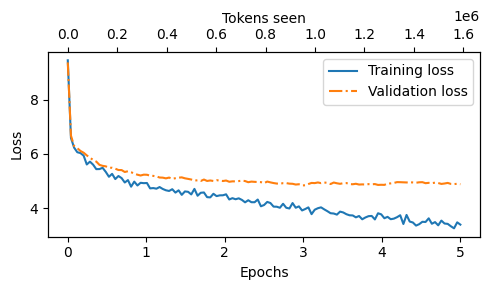

In [88]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [13]:
token_ids = generate(
    model=model,
    idx=text_to_token_ids("First Citizen: Before we proceed any further, hear me speak.", tokenizer),
    max_new_tokens=100,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 First Citizen: Before we proceed any further, hear me speak.

Third Citizen:
Sir, they'll leave your will go:
Come hither; if I think your own friends, or stay by thence was. There did I fear in
your life. We'll tell them. I am
with
AUTOLYCUS:
Come on a wife. They the ball, you have been born from me. To: but they have forgot; therefore I warrant it
hanks, as the case of the
have in a good




In [ ]:
torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "Models/Tamil_Brahmi_1.pth"
)

In [ ]:
checkpoint = torch.load("Models/Tamil_Brahmi_1.pth", weights_only=True)

model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train();